### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from joblib import dump, load
from sklearn.metrics import accuracy_score, precision_score

In [2]:
churn_data = pd.read_csv('customer_churn_dataset.csv')
churn_data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [3]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,64374.0,41.970982,13.924911,18.0,30.0,42.0,54.0,65.0
Tenure,64374.0,31.994827,17.098234,1.0,18.0,33.0,47.0,60.0
Usage Frequency,64374.0,15.080234,8.816470,1.0,7.0,15.0,23.0,30.0
Support Calls,64374.0,5.400690,3.114005,0.0,3.0,6.0,8.0,10.0
Payment Delay,64374.0,17.133952,8.852211,0.0,10.0,19.0,25.0,30.0
Total Spend,64374.0,541.023379,260.874809,100.0,313.0,534.0,768.0,1000.0
Last Interaction,64374.0,15.498850,8.638436,1.0,8.0,15.0,23.0,30.0
Churn,64374.0,0.473685,0.499311,0.0,0.0,0.0,1.0,1.0


In [4]:
churn_data.nunique()

Age                   48
Gender                 2
Tenure                60
Usage Frequency       30
Support Calls         11
Payment Delay         31
Subscription Type      3
Contract Length        3
Total Spend          901
Last Interaction      30
Churn                  2
dtype: int64

In [5]:
churn_data['Usage Frequency'].unique()

array([14, 28, 10, 12, 24, 15, 11,  5,  4, 27, 23,  7, 17,  3, 30,  2, 19,
       20, 18,  8,  6, 21, 26, 16, 25, 13, 29,  9, 22,  1])

In [6]:
n_data = churn_data.dropna()

In [7]:
n_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,64374.0,41.970982,13.924911,18.0,30.0,42.0,54.0,65.0
Tenure,64374.0,31.994827,17.098234,1.0,18.0,33.0,47.0,60.0
Usage Frequency,64374.0,15.080234,8.816470,1.0,7.0,15.0,23.0,30.0
Support Calls,64374.0,5.400690,3.114005,0.0,3.0,6.0,8.0,10.0
Payment Delay,64374.0,17.133952,8.852211,0.0,10.0,19.0,25.0,30.0
Total Spend,64374.0,541.023379,260.874809,100.0,313.0,534.0,768.0,1000.0
Last Interaction,64374.0,15.498850,8.638436,1.0,8.0,15.0,23.0,30.0
Churn,64374.0,0.473685,0.499311,0.0,0.0,0.0,1.0,1.0


### Data Visualization

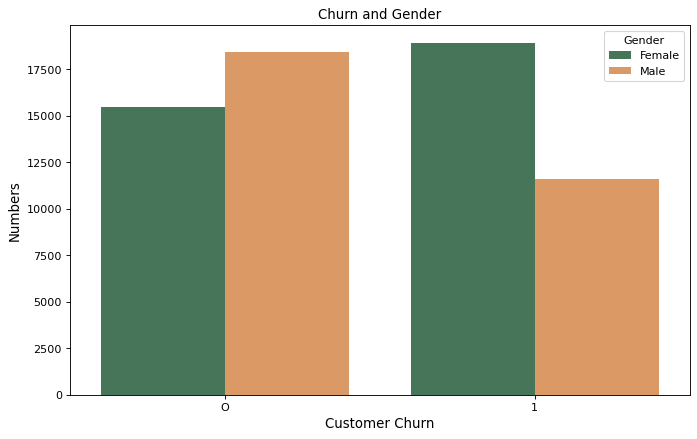

In [8]:
data = n_data[['Churn', 'Gender']]
grouped_data = data.groupby(['Churn', 'Gender']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
grouped_data['Churn'] = grouped_data['Churn'].replace({0: 'O', 1: '1'})
grouped_data['Gender'] = grouped_data['Gender'].replace({0: 'Male', 1: 'Female'})

sns.barplot(x='Churn', y='Counts', hue='Gender', data=grouped_data, palette=['#3F7D58', '#EF9651'])
ax.set_title('Churn and Gender')
ax.set_ylabel('Numbers', size=12)
ax.set_xlabel('Customer Churn', size=12)
plt.show()


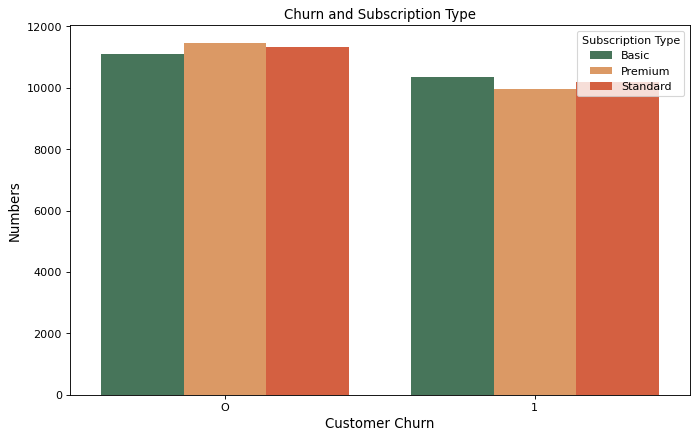

In [9]:
data = n_data[['Churn', 'Subscription Type']]
grouped_data = data.groupby(['Churn', 'Subscription Type']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
grouped_data['Churn'] = grouped_data['Churn'].replace({0: 'O', 1: '1'})
grouped_data['Subscription Type'] = grouped_data['Subscription Type'].replace({0: 'Basic', 1: 'Standard', 2: 'Premium'})

sns.barplot(x='Churn', y='Counts', hue='Subscription Type', data=grouped_data, palette=['#3F7D58', '#EF9651', '#EC5228'])
ax.set_title('Churn and Subscription Type')
ax.set_ylabel('Numbers', size=12)
ax.set_xlabel('Customer Churn', size=12)
plt.show()


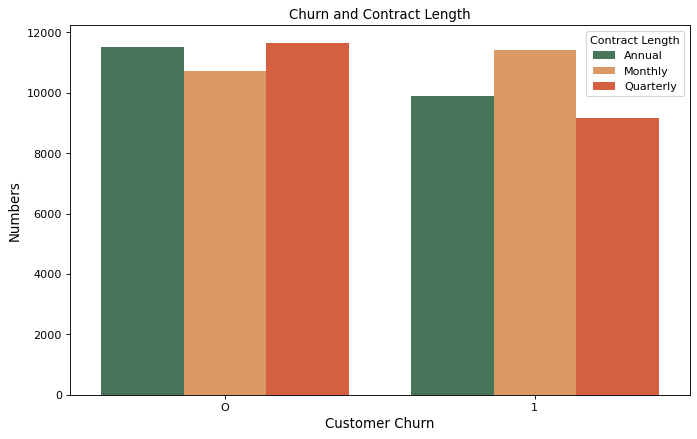

In [10]:
data = n_data[['Churn', 'Contract Length']]
grouped_data = data.groupby(['Churn', 'Contract Length']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
grouped_data['Churn'] = grouped_data['Churn'].replace({0: 'O', 1: '1'})
grouped_data['Contract Length'] = grouped_data['Contract Length'].replace({0: 'Monthly', 1: 'Annual', 2: 'Quarterly'})

sns.barplot(x='Churn', y='Counts', hue='Contract Length', data=grouped_data, palette=['#3F7D58', '#EF9651', '#EC5228'])
ax.set_title('Churn and Contract Length')
ax.set_ylabel('Numbers', size=12)
ax.set_xlabel('Customer Churn', size=12)
plt.show()

### Separate input and output features

In [11]:
x = churn_data.drop(columns=['Churn'])
y = churn_data['Churn']

### Encoding

In [12]:
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']
encoder = BinaryEncoder()
x_encoded = encoder.fit_transform(x[categorical_features])
x = x.drop(categorical_features, axis=1)
x = x.reset_index(drop=True)
x_encoded = x_encoded.reset_index(drop=True)
x = pd.concat([x, x_encoded], axis=1)

In [13]:
imputer = SimpleImputer(strategy='mean')
x_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Apply SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x_imputed, y)

In [14]:
y.value_counts()

Churn
1    33881
0    33881
Name: count, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .25, random_state=42)

In [16]:
dcs = DecisionTreeClassifier()
dcs.fit(x_train, y_train)
export_graphviz(dcs, out_file='tree.dot', filled=True, feature_names=x_train.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph) 

# save model
dump(dcs, "churn_prediction_model.joblib")

['churn_prediction_model.joblib']

In [17]:
dcs_prediction = dcs.predict(x_test)
dcs_accuracy = accuracy_score(dcs_prediction, y_test)
dcs_precision = precision_score(dcs_prediction, y_test)

print(f"Accuracy: {dcs_accuracy*100}")
print(f"Precision: {dcs_precision*100}")

Accuracy: 99.85833185762351
Precision: 99.90564925109094


In [18]:
loaded_model = load("churn_prediction_model.joblib")
loaded_prediction = loaded_model.predict(x_test)